                                                                                              Francesca and Hilal
                                                                                                MidTerm Project
# Diamonds Analysis
                                                                                              

#### This classic dataset contains the prices and other attributes of almost 54,000 diamonds.








## Table of Content

##### Modeling project based on analyzing diamonds by their cut, color, clarity, price, and other attributes.
                                                                                              
#### GOALS
-

#### DATA ANALYSIS STEPS
- 
-
-
-
-
-

#### DATA VISUALIZATION
-

#### CHALLENGES
- 


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd





### Read and Open the dataset file

In [95]:
diamonds=pd.read_csv('diamonds.csv')
diamonds

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


#### Check the data info

In [96]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

### All the column names are standardized and we don't need to make any changes but for practical reasons we make shorter 2 column names.

In [97]:
# method 1: 

diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant', 'fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True)
diamonds


,diamond_id,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [98]:
# method 2 with the function:

def rename_columns(diamonds):
    diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant','fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True )
    return diamonds
rename_columns(diamonds)


,diamond_id,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


### Remove the less important informations (columns)

In [99]:
# method 1:

# diamonds.drop(columns=['diamond_id', 'date'], inplace=True)
# diamonds

In [100]:
# method 2 with the function:

def drop_columns(diamonds):
    diamonds.drop(columns=['diamond_id', 'date'], inplace=True)
    return diamonds

drop_columns(diamonds)

,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
0,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,1.79,M,M,N,NaN,NaN,None,IGI,200,NaN
1,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,1.78,STK,STK,N,NaN,NaN,None,IGI,200,NaN
2,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,1.77,TN,M,NaN,NaN,NaN,None,IGI,200,NaN
3,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,1.78,M,STK,NaN,NaN,NaN,None,IGI,200,NaN
4,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,1.82,STK,STK,N,NaN,NaN,None,IGI,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,8.66,M,STK,N,NaN,NaN,None,GIA,1210692,NaN
219700,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,...,5.71,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN
219701,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,10.20,TN,M,N,NaN,NaN,None,GIA,1315496,NaN
219702,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,...,3.47,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN


#### Rearranging columns

In [101]:
list(diamonds.columns)

['shape',
 'size',
 'color',
 'fancy_color_dominant',
 'fancy_color_secondary',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'clarity',
 'cut',
 'symmetry',
 'polish',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'culet_size',
 'culet_condition',
 'fluor_color',
 'fluor_intensity',
 'lab',
 'total_sales_price',
 'eye_clean']

In [102]:
diamonds = diamonds[[
    'shape',
    'size',
    'clarity',
    'cut',
    'symmetry',
    'polish',
    'depth_percent',
    'table_percent',
    'meas_length',
    'meas_width',
    'meas_depth',
    'girdle_min',
    'girdle_max',
    'culet_size',
    'culet_condition',
    'eye_clean',
    'color',
    'fancy_color_dominant',
    'fancy_color_secondary',
    'fancy_color_overtone',
    'fancy_color_intensity',
    'fluor_color',
    'fluor_intensity',
    'lab',
    'total_sales_price',
 ]]

diamonds.head()

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,lab,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200


### Data Subsetting
##### Check if the content of the categorical columns contain different defined data. Return unique values.

In [103]:
diamonds['shape'].unique()

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

In [104]:
diamonds['cut'].unique()

array(['Excellent', 'Very Good', nan, 'Good', 'Fair', 'None', 'Ideal'],
      dtype=object)

In [105]:
diamonds['clarity'].unique()

array(['VVS2', 'VVS1', 'I1', 'VS1', 'VS2', 'IF', 'SI2', 'I2', 'SI1',
       'SI3', 'I3'], dtype=object)

In [106]:
diamonds['symmetry'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [107]:
diamonds['polish'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [108]:
diamonds['girdle_min'].unique()

array(['M', 'STK', 'TN', 'TK', nan, 'VTN', 'VTK', 'XTK', 'XTN', 'STN'],
      dtype=object)

In [109]:
diamonds['girdle_max'].unique()

array(['M', 'STK', 'TK', nan, 'TN', 'VTK', 'XTK', 'XTN', 'VTN', 'STN'],
      dtype=object)

In [110]:
diamonds['culet_condition'].unique()

array([nan, 'Abraded', 'Chipped', 'Pointed'], dtype=object)

In [111]:
diamonds['culet_size'].unique()

array(['N', nan, 'S', 'M', 'VS', 'L', 'EL', 'SL', 'VL'], dtype=object)

In [112]:
diamonds['eye_clean'].unique()

array([nan, 'Yes', 'E1', 'Borderline', 'No'], dtype=object)

In [113]:
diamonds['color'].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

In [114]:
diamonds['fancy_color_dominant'].unique()

array([nan, 'Orange', 'Brown', 'Yellow', 'Pink', 'Black', 'Other', 'Gray',
       'Purple', 'Blue', 'Green', 'Chameleon', 'Red'], dtype=object)

In [115]:
diamonds['fancy_color_secondary'].unique()

array([nan, 'Purple', 'Green', 'Yellow', 'Brown', 'Orange', 'Pink',
       'Gray', 'Blue', 'Violet', 'Red'], dtype=object)

In [116]:
diamonds['fancy_color_overtone'].unique()

array([nan, 'None', 'Yellowish', 'Brownish', 'Pinkish', 'Greenish',
       'Orangey', 'Purplish', 'Grayish'], dtype=object)

In [117]:
diamonds['fancy_color_intensity'].unique()

array([nan, 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

In [118]:
diamonds['fluor_color'].unique()

array([nan, 'Blue', 'Yellow', 'Green', 'White', 'Orange'], dtype=object)

In [119]:
diamonds['fluor_intensity'].unique()

array(['None', 'Very Slight', 'Strong', 'Medium', 'Faint', 'Very Strong',
       nan, 'Slight'], dtype=object)

In [120]:
diamonds['lab'].unique()

array(['IGI', 'GIA', 'HRD'], dtype=object)

### Statistical summary of numerical columns

In [121]:
diamonds.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
size,219704.0,0.76,0.85,0.08,0.31,0.50,1.00,19.35
depth_percent,219704.0,61.68,9.92,0.00,61.20,62.40,63.50,98.70
table_percent,219704.0,57.75,9.96,0.00,57.00,58.00,60.00,94.00
meas_length,219704.0,5.55,1.76,0.00,4.35,5.06,6.35,93.66
meas_width,219704.0,5.14,1.37,0.00,4.31,4.80,5.70,62.30
meas_depth,219704.0,3.29,2.05,0.00,2.68,3.03,3.63,76.30
total_sales_price,219704.0,6908.04,25959.44,200.00,958.00,1970.00,5207.00,1449881.00


### Removing Duplicates
##### removing duplicated rows

In [122]:
diamonds = diamonds.drop_duplicates()
diamonds

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,lab,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,IGI,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,GIA,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,...,NaN,NaN,Green,NaN,None,Fancy Light,NaN,None,GIA,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,...,NaN,E,NaN,NaN,NaN,NaN,NaN,None,GIA,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,...,NaN,NaN,Red,NaN,NaN,Fancy,NaN,Faint,GIA,1350000


dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns

### Dropping columns which contain null values more than 75%. 

In [123]:
# identify percentage of null values per column.

nulls_df = pd.DataFrame(round(diamonds.isna().sum()/len(diamonds),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,shape,0.00
1,size,0.00
2,clarity,0.00
3,cut,27.92
4,symmetry,0.00
5,polish,0.00
6,depth_percent,0.00
7,table_percent,0.00
8,meas_length,0.00
9,meas_width,0.00


In [124]:
columns_drop = nulls_df[nulls_df['percent_nulls']>75]['header_name']
print(columns_drop.values)

['culet_condition' 'fancy_color_dominant' 'fancy_color_secondary'
 'fancy_color_overtone' 'fancy_color_intensity' 'fluor_color']


In [125]:
def drop_columns(diamonds):
    diamonds.drop(columns=['culet_condition', 'fancy_color_dominant', 'fancy_color_secondary', 'fancy_color_overtone', 'fancy_color_intensity', 'fluor_color'], inplace=True)
    return diamonds

drop_columns(diamonds)

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,lab,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,IGI,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,IGI,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,IGI,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,IGI,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,IGI,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,M,STK,N,NaN,E,None,GIA,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,GIA,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,TN,M,N,NaN,E,None,GIA,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000


### Removing Outliers 

In [126]:
Q2 = diamonds.quantile(0.25)
Q4 = diamonds.quantile(0.75)
IQR1 = Q4 - Q2

diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]

diamonds

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_75561/2035386957.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]


,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,lab,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,IGI,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,IGI,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,IGI,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,IGI,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,IGI,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,56.0,7.36,7.41,4.50,TN,M,N,NaN,I,Medium,GIA,11791
193896,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,60.0,7.41,7.44,4.53,M,STK,N,NaN,I,Faint,GIA,11791
193900,Round,1.51,SI2,Very Good,Excellent,Excellent,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,NaN,I,None,GIA,11791
193902,Round,1.08,VS2,Excellent,Excellent,Excellent,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,Yes,E,None,GIA,11791


### Get numerical data to check correlations

In [127]:
# method 1:

diamonds_numerical = diamonds._get_numeric_data()
diamonds_numerical

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.09,62.7,59.0,2.85,2.87,1.79,200
1,0.09,61.9,59.0,2.84,2.89,1.78,200
2,0.09,61.1,59.0,2.88,2.90,1.77,200
3,0.09,62.0,59.0,2.86,2.88,1.78,200
4,0.09,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50,11791
193896,1.51,61.0,60.0,7.41,7.44,4.53,11791
193900,1.51,63.9,57.0,7.12,7.17,4.56,11791
193902,1.08,62.7,57.0,6.54,6.55,4.10,11791


In [128]:
# method 2:

# diamonds_num = diamonds.select_dtypes('number')
# diamonds_num

<Figure size 432x288 with 0 Axes>

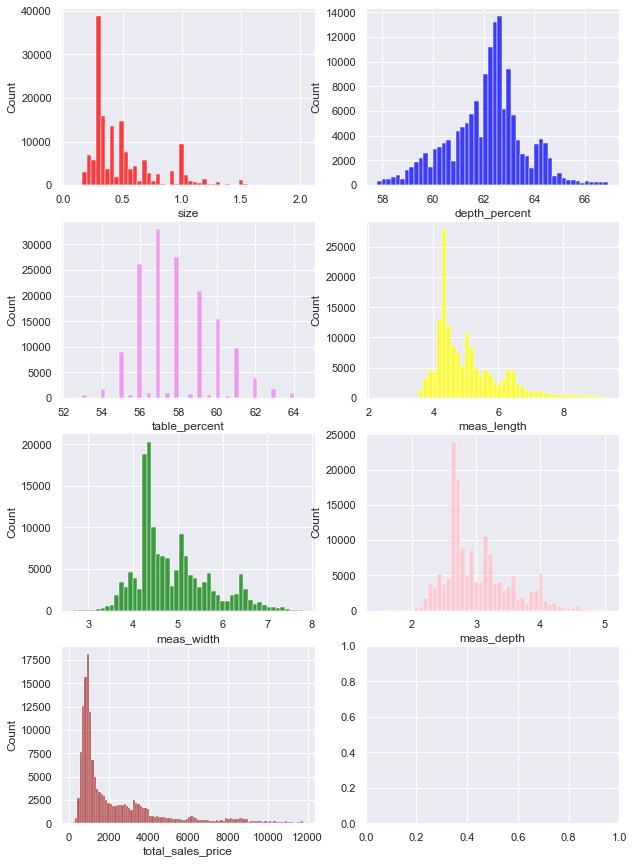

In [129]:
plt.suptitle('seaborn all')

#displot did not work as subplots so we used histplots

fig, ax = plt.subplots(4,2,figsize = (10,15))
sns.histplot((diamonds_numerical['size']), color="red", bins=50, ax=ax[0,0])
sns.histplot((diamonds_numerical['depth_percent']), color="blue", bins=50,ax=ax[0,1])
sns.histplot((diamonds_numerical['table_percent']), color="violet", bins=50,ax=ax[1,0])
sns.histplot((diamonds_numerical['meas_length']), color="yellow", bins=50,ax=ax[1,1])
sns.histplot((diamonds_numerical['meas_width']), color="green", bins=50,ax=ax[2,0])
sns.histplot((diamonds_numerical['meas_depth']), color="pink", bins=50,ax=ax[2,1])
sns.histplot((diamonds_numerical['total_sales_price']), color="brown", bins=100,ax=ax[3,0])

sns.set(rc = {'figure.figsize':(15,8)})


### Heatmaps to check correlations

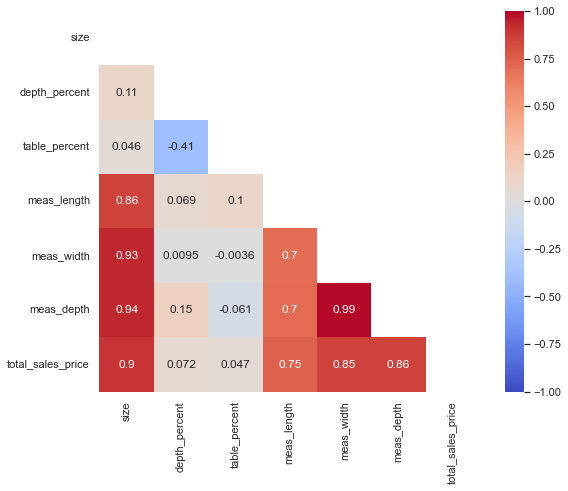

In [130]:
corr = diamonds_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [131]:
diamonds_numerical.corr().round(2)

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
size,1.00,0.11,0.05,0.86,0.93,0.94,0.90
depth_percent,0.11,1.00,-0.41,0.07,0.01,0.15,0.07
table_percent,0.05,-0.41,1.00,0.10,-0.00,-0.06,0.05
meas_length,0.86,0.07,0.10,1.00,0.70,0.70,0.75
meas_width,0.93,0.01,-0.00,0.70,1.00,0.99,0.85
meas_depth,0.94,0.15,-0.06,0.70,0.99,1.00,0.86
total_sales_price,0.90,0.07,0.05,0.75,0.85,0.86,1.00


### Getting dummys from categorical values

In [41]:
# select categorical values

diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,lab
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,NaN,E,None,IGI
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,NaN,E,None,IGI
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,NaN,E,None,IGI
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,NaN,E,None,IGI
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,NaN,E,None,IGI
...,...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,NaN,I,Medium,GIA
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,NaN,I,Faint,GIA
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,NaN,I,None,GIA
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,Yes,E,None,GIA


In [42]:
# get the dummies and use drop_first=True to reduce the data volume dropping the first colums.

diamonds_dummy = pd.get_dummies(diamonds_cat, drop_first=True)
diamonds_dummy

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Split the Numerical Data in X and y, train and test sets.

In [43]:
X_num = diamonds_numerical.drop('total_sales_price', axis=1)
y_num = diamonds_numerical.total_sales_price

X_num

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82
...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50
193896,1.51,61.0,60.0,7.41,7.44,4.53
193900,1.51,63.9,57.0,7.12,7.17,4.56
193902,1.08,62.7,57.0,6.54,6.55,4.10


In [44]:
y_num

0           200
1           200
2           200
3           200
4           200
          ...  
193895    11791
193896    11791
193900    11791
193902    11791
193903    11791
Name: total_sales_price, Length: 155718, dtype: int64

In [45]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=.30,random_state=123)

# test_size=.30  -> indicates that the test_set will be 30% or the samples and the training_set 70%.

In [46]:
X_num_train.shape

(109002, 6)

In [47]:
X_num_test.shape

(46716, 6)

In [48]:
X_num_train

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
94823,0.32,62.3,58.0,4.38,4.40,2.73
146217,0.61,62.8,58.0,5.38,5.41,3.39
24910,0.30,61.5,57.0,4.28,4.32,2.64
185218,1.01,60.6,60.0,6.41,6.43,3.89
140437,0.70,59.6,61.0,5.72,5.74,3.41
...,...,...,...,...,...,...
179205,1.00,65.4,59.0,5.81,6.55,4.29
139626,0.71,63.4,60.0,8.25,4.70,2.98
20380,0.30,62.6,57.0,4.24,4.28,2.66
31693,0.40,62.5,56.0,4.66,4.68,2.92


### Standardize the data

In [68]:

std_scaler = StandardScaler().fit(X_num_train)       # it calculates the z score.

X_num_train_scaled = std_scaler.transform(X_num_train)   # transforming the data: normalization of all data. 


X_num_test_scaled = std_scaler.transform(X_num_test)



### Transforming the arrays resulting from the standardization in DataFrames

In [69]:
X_num_train_scaled = pd.DataFrame(X_num_train_scaled, columns=X_num.columns, index=X_num_train.index)
X_num_train_scaled

# columns=X_num.columns    ---> to keep the name of the columns.
# index=X_num_train.index  ---> to keep the original index.

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344
...,...,...,...,...,...,...
179205,1.771014,2.187997,0.548204,0.702686,2.052585,2.482163
139626,0.739654,0.847476,1.061989,3.027049,-0.207124,-0.073556
20380,-0.718477,0.311267,-0.479366,-0.792909,-0.720139,-0.697854
31693,-0.362835,0.244241,-0.993151,-0.392813,-0.231553,-0.190612


In [70]:
X_num_test_scaled  = pd.DataFrame(X_num_test_scaled, columns=X_num.columns, index=X_num_test.index)
X_num_test_scaled

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386
...,...,...,...,...,...,...
142914,0.704090,3.193388,2.603344,1.074203,-0.830070,-0.424723
64473,-0.540656,0.378293,-0.479366,-0.592861,-0.463631,-0.424723
81364,-0.611784,-0.090889,0.548204,-0.621439,-0.524704,-0.522270
19654,-0.718477,0.445319,-0.993151,-0.773856,-0.744568,-0.658835


### Split the Categorical-Dummy Data in X and y, train and test sets.

In [71]:
X_cat = diamonds_dummy

X_cat

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [72]:
X_cat_train, X_cat_test = train_test_split(X_cat, test_size=.30,random_state=123)
X_cat_test

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
165694,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
115539,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
108831,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
21097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
186515,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142914,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
64473,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81364,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
19654,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [73]:
X_cat_train

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
94823,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
146217,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
24910,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
185218,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
140437,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179205,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
139626,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20380,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
31693,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Concatenate X_train and X_test from 

In [74]:
X_train = pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_train

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179205,1.771014,2.187997,0.548204,0.702686,2.052585,2.482163,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
139626,0.739654,0.847476,1.061989,3.027049,-0.207124,-0.073556,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20380,-0.718477,0.311267,-0.479366,-0.792909,-0.720139,-0.697854,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31693,-0.362835,0.244241,-0.993151,-0.392813,-0.231553,-0.190612,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [75]:
X_test = pd.concat([X_num_test_scaled, X_cat_test],axis=1)
X_test

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_HRD,lab_IGI
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142914,0.704090,3.193388,2.603344,1.074203,-0.830070,-0.424723,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
64473,-0.540656,0.378293,-0.479366,-0.592861,-0.463631,-0.424723,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81364,-0.611784,-0.090889,0.548204,-0.621439,-0.524704,-0.522270,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19654,-0.718477,0.445319,-0.993151,-0.773856,-0.744568,-0.658835,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Modeling using Statsmodels

In [76]:
X_train_const = sm.add_constant(X_train)     # adding a constant

model = sm.OLS(y_num_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test)       # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.387e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:42:41   Log-Likelihood:            -8.7307e+05
No. Observations:              109002   AIC:                         1.746e+06
Df Residuals:                  108927   BIC:                         1.747e+06
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

lasso, ridge

### Modeling using Linear Regression

In [77]:

model = LinearRegression()            # model
model.fit(X_train, y_num_train)       # model train

LinearRegression()

In [78]:
model.coef_

array([ 2.57788556e+03,  5.86073578e+01,  5.94959892e+00, -5.99042242e+02,
        1.04110096e+03, -7.02978450e+02, -2.37782678e+02,  1.98019016e+02,
        6.81725873e+02, -4.42454939e+02,  2.20415407e+03,  1.12197182e+03,
        1.54672204e+03,  2.20960609e+03,  1.37266666e+02,  7.73455424e+02,
       -9.30479265e+02, -1.40626553e+03,  1.77368851e+03,  1.10204185e+03,
        7.23783868e+02,  1.50576905e+03,  1.39347479e+03,  1.67987970e+03,
        1.57397331e+03, -3.26086712e+03, -8.88218202e+02, -6.89069910e+01,
        1.07234467e+03,  6.73747424e+02, -2.42954141e+01, -1.33946574e+03,
        6.31627920e+02, -1.10022797e+01,  1.27917111e+01,  8.06863931e+01,
       -4.78681579e+01,  7.19152056e+01, -3.79121393e+01,  2.93028457e+01,
        4.88968704e+02, -6.36966440e+00,  2.85909853e+01,  1.53099619e+02,
        3.35169232e+01, -7.74119034e+01,  2.71009613e+01,  9.31362018e+01,
        1.96342477e+02,  6.02355892e+02,  3.94582769e+01,  1.04739351e+01,
        1.31230789e+02, -

In [79]:
model.intercept_

750.0597205396098

In [80]:

y_pred = model.predict(X_test)          # model prediction

y_pred_train = model.predict(X_train)

In [81]:
residual = y_num_test - y_pred
residual

165694   -317.978371
115539   -606.270106
108831   -106.407569
21097     400.214729
186515   -489.309697
             ...    
142914    -59.640447
64473    -258.208570
81364    -251.115228
19654     340.406310
76920    -475.119748
Name: total_sales_price, Length: 46716, dtype: float64

In [82]:
result=pd.DataFrame({"y_test":y_num_test,"y_pred":y_pred})

In [83]:
R2=r2_score(y_num_test,y_pred)
R2

0.9008136467774535

### Make scatter plots

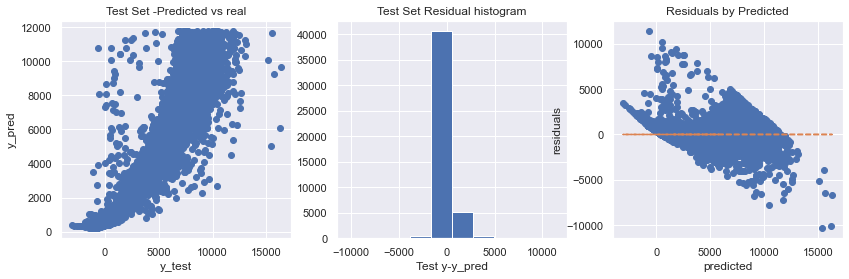

In [84]:

# scatter plot of y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_num_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


# Get a histogram of Test y - y_pred.

ax[1].hist(residual)                             ## residual = (y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


# scatter plot of residuals by predicted

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



### Seabirn Residual Plot 

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

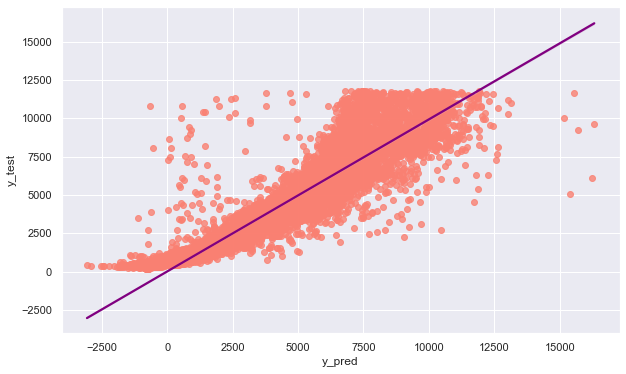

In [89]:
plt.figure(figsize=(10,6))
        
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "salmon"}, line_kws={"color": "purple"})